In [39]:
import numpy as np
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

''' Data Preparation '''

from scipy.stats import pearsonr
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import roc_curve, auc,roc_auc_score,log_loss	
from sklearn.metrics import confusion_matrix,classification_report


''' Machine learning Algorithms '''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb


In [6]:
PATH = "creditcard.csv"
df = pd.read_csv(PATH)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
print(f"Columns : {df.columns}")
print(f"Missing Values :  {df.isna().sum().sum()}")

Columns : Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Missing Values :  0


In [13]:
print(f"The Label consist : \n{df['Class'].value_counts()}") ## Highly diverse

The Label consist : 
0    284315
1       492
Name: Class, dtype: int64


In [14]:
df.apply(lambda col : len(col.unique()))

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [16]:
X = df.copy().drop(["Class"],axis=1)
Y = df["Class"].copy()

In [17]:
# Scaling the Features
featureToScale = X.drop(["Time"],axis=1).columns
sX = pp.StandardScaler(copy=True)
X[featureToScale] = sX.fit_transform(X[featureToScale])

In [22]:
print(X.apply(lambda col : round(col.mean())),"\n")
print(X.apply(lambda col : round(col.std())))

Time      94814
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
dtype: int64 

Time      47488
V1            1
V2            1
V3            1
V4            1
V5            1
V6            1
V7            1
V8            1
V9            1
V10           1
V11           1
V12           1
V13           1
V14           1
V15           1
V16           1
V17           1
V18           1
V19           1
V20           1
V21           1
V22           1
V23           1
V24           1
V25           1
V26           1
V27           1
V28           1
Amount        1
dtype: int64


In [26]:
# Create the correlation Matrix
correlationMatrix = pd.DataFrame([],index=X.columns,columns=X.columns)
for i in X.columns:
	for j in X.columns:
		correlationMatrix.loc[i,j] = np.round(pearsonr(X.loc[:,i],X.loc[:,j])[0],2)
correlationMatrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01
V1,0.12,1,-0,-0,-0,0,0,0,-0,0,...,0,-0,0,0,-0,-0,-0,0,0,-0.23
V2,-0.01,-0,1,0,-0,0,0,-0,-0,-0,...,0,0,0,0,-0,0,0,-0,-0,-0.53
V3,-0.42,-0,0,1,-0,-0,0,0,-0,0,...,0,-0,-0,-0,0,0,-0,0,0,-0.21
V4,-0.11,-0,-0,-0,1,-0,-0,-0,0,0,...,-0,-0,0,0,0,0,-0,-0,-0,0.1
V5,0.17,0,0,-0,-0,1,0,-0,0,0,...,-0,-0,0,0,-0,-0,0,0,-0,-0.39
V6,-0.06,0,0,0,-0,0,1,-0,-0,-0,...,0,-0,-0,0,-0,0,-0,-0,0,0.22
V7,0.08,0,-0,0,-0,-0,-0,1,-0,0,...,0,0,-0,-0,-0,0,-0,-0,0,0.4
V8,-0.04,-0,-0,-0,0,0,-0,-0,1,0,...,0,0,0,0,-0,-0,0,0,-0,-0.1
V9,-0.01,0,-0,0,0,0,-0,0,0,1,...,-0,0,-0,-0,-0,0,-0,-0,0,-0.04


Text(0.5, 1.0, 'Frequency Percentage by Class')

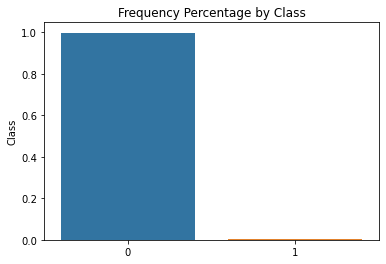

In [34]:
class_counts = Y.value_counts().sort_index()
ax = sns.barplot(x=class_counts.index,y=class_counts / len(X))
ax.set_title("Frequency Percentage by Class")

In [45]:
	
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=99)
def getLogReg(penalty = "l2",C = 1.0,class_weight = "balanced",random_state=0,solver="liblinear"):
	return LogisticRegression(penalty=penalty,C=C,class_weight=class_weight,random_state=random_state,solver=solver)

def TrainingTime():
	"""
	Only extracting the Predicted Result for positive Class, which is low of data. 

	Return 
	"""
	training_scores = []
	cvScores = []
	predictionBasedOnKFolds = pd.DataFrame(data = [],index=Y.index,columns=[0,1])
	model = getLogReg()

	for train_index, cv_index in skf.split(X,Y.ravel()):
		x_train_fold,x_cv_fold = X.loc[train_index,:],X.loc[cv_index,:]
		y_train_fold,y_cv_fold = Y.loc[train_index],Y.loc[cv_index]
		
		model.fit(x_train_fold,y_train_fold)
		
		logLossTraining = log_loss(y_train_fold,model.predict_proba(x_train_fold)[:,1])
		training_scores.append(logLossTraining)

		predictionBasedOnKFolds.loc[x_cv_fold.index,:] = model.predict_proba(x_cv_fold)
		logLossCV = log_loss(y_cv_fold,predictionBasedOnKFolds.loc[x_cv_fold.index,1])
		cvScores.append(logLossCV)

		print(f"Training Log Loss : {logLossTraining}")
		print(f"Cross Validation Log Loss : {logLossCV}")
	print(f"\n\nMean Training Log Loss {np.mean(training_scores)}")
	print(f"Mean Cross Validation Log Loss {np.mean(cvScores)}")

	return predictionBasedOnKFolds
predicitionBasedOnKFolds = TrainingTime()


Training Log Loss : 0.11641844350178772
Cross Validation Log Loss : 0.12487170267256129
Training Log Loss : 0.0999350859944587
Cross Validation Log Loss : 0.09413079218167088
Training Log Loss : 0.11733373652467899
Cross Validation Log Loss : 0.11425590510124739
Training Log Loss : 0.10365047829771204
Cross Validation Log Loss : 0.10511453781918834
Training Log Loss : 0.10956516556160259
Cross Validation Log Loss : 0.10840725359774314


Mean Training Log Loss 0.10938058197604801
Mean Cross Validation Log Loss 0.10935603827448222


Text(0.5, 1.0, 'Precision recall Curve Avg Precision : 0.7272914111405745')

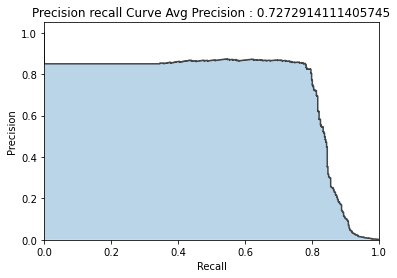

In [67]:
''' Plot the Precision Recall Curve'''
preds = pd.concat([Y,predicitionBasedOnKFolds.loc[:,1]],axis =1)
preds.columns = ["Actual","Predicted"]

predicitionBasedOnKFoldsLogisticRegression = preds.copy()
precision,recall,thresholds = precision_recall_curve(preds["Actual"],preds["Predicted"])

average_precision = average_precision_score(preds["Actual"],preds["Predicted"])
plt.step(recall,precision,color="k",alpha = 0.7,where="post")
plt.fill_between(recall,precision,step="post",alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0,1.05])
plt.xlim(0.0,1.0)
plt.title(f"Precision recall Curve Avg Precision : {average_precision}")

In [65]:
help(plt.fill_between)

Help on function fill_between in module matplotlib.pyplot:

fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs)
    Fill the area between two horizontal curves.
    
    The curves are defined by the points (*x*, *y1*) and (*x*,
    *y2*).  This creates one or multiple polygons describing the filled
    area.
    
    You may exclude some horizontal sections from filling using *where*.
    
    By default, the edges connect the given points directly.  Use *step*
    if the filling should be a step function, i.e. constant in between
    *x*.
    
    Parameters
    ----------
    x : array (length N)
        The x coordinates of the nodes defining the curves.
    
    y1 : array (length N) or scalar
        The y coordinates of the nodes defining the first curve.
    
    y2 : array (length N) or scalar, default: 0
        The y coordinates of the nodes defining the second curve.
    
    where : array of bool (length N), optional
        Define *